[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Moorea-AI/AI4ENG_UDEA/blob/main/01_Exploración_de_datos.ipynb)

#EXPLORACIÓN DE DATOS PARA EL DATASET "Fraude en Transacciones Electrónicas" <br>
###TOMADO DE: https://www.kaggle.com/competitions/ieee-fraud-detection/data?select=test_transaction

Presentado por: </br>
Aura Luz Moreno Díaz, Estudiante de Ingeniería Industrial </br>
Evelyn Zharick Saez Gallego, Estudiante de Ingeniería Ambiental</br></br>
Para la materia:<br>
INTRODUCCIÓN A LA INTELIGENCIA ARTIFICIAL PARA LAS CIENCIAS Y LA INGENIERIA<BR>
Con el profesor: RAÚL RAMOS POLLAN

In [14]:
#PASO 1: Importación de librerias que serán necesarias para la exploración de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import requests
import json
import seaborn as sns

#Importacion de librerias para manipulación de datos para Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc

import warnings
warnings.filterwarnings('ignore')



##1. Lectura y concatenación de los Dataset

In [15]:
# Cargando credenciales de Kaggle
data = {"username":"mooreamed","key":"a253e996d6247d9093be1edd604d0125"}
with open('kaggle.json', 'w') as file:
    json.dump(data, file, indent=4)

#!cp kaggle.json ~/.kaggle/

In [16]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! cp kaggle.json ~/.kaggle/

In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [23]:
# Se descarga el dataset
!kaggle datasets download -d niangmohamed/ieeecis-fraud-detection

# Se descomprime el dataset
!unzip ieeecis-fraud-detection.zip

 97% 115M/118M [00:01<00:00, 95.9MB/s]
100% 118M/118M [00:01<00:00, 91.3MB/s]
Archive:  ieeecis-fraud-detection.zip
  inflating: sample_submission.csv   
  inflating: test_identity.csv       
  inflating: test_transaction.csv    
  inflating: train_identity.csv      
  inflating: train_transaction.csv   


In [13]:
#Verificamos que se este funcionando la conexión de la API
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                          Spotify and Youtube                                   9MB  2023-03-20 15:43:25           9218        335  1.0              
arnabchaki/data-science-salaries-2023                          Data Science Salaries 2023  💸                        25KB  2023-04-13 09:55:16           2613         69  1.0              
erdemtaha/cancer-data                                          Cancer Data                                          49KB  2023-03-22 07:57:00           4281         97  1.0              
evangower/premier-league-2022-2023                             Pr

### ANALISIS DE LOS DATOS

####**TABLA IDENTITY** <BR>
Las variables en esta tabla son información de identidad: 
<BR><BR>
información de conexión de red (IP, ISP, Proxy, etc.) y firma digital (UA/
navegador/OS/versión, etc.) asociada con las transacciones.<BR><BR>
Son recopilados por el sistema de protección contra fraudes de Vesta y los socios de seguridad digital.<BR><BR>
(Los nombres de los campos están enmascarados y no se proporcionará el diccionario por pares para la protección de la privacidad y el acuerdo del contrato)<BR><BR>

TransactionID<br>
id_12 - id_38<BR>
DeviceType<BR>
DeviceInfo<BR>
<BR>
####**TABLA TRANSACCIONES:** <BR>

TransactionDT: timedelta de una fecha y hora de referencia determinada (no una marca de tiempo real). timedelta de una fecha y hora de referencia dada (no una marca de tiempo real). El primer valor de TransactionDT es 86400, que corresponde a la cantidad de segundos en un día (60 * 60 * 24 = 86400), así que creo que la unidad es segundos. Usando esto, sabemos que los datos abarcan 6 meses, ya que el valor máximo es 15811131, que correspondería al día 183”
<BR>

TransactionAMT: monto del pago de la transacción en USD<BR>

ProductCD: código de producto, el producto para cada transacción<BR>

card1 - card6: información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco emisor, país, etc.<BR>

dirección: dirección addr1 como región de facturación, addr2 como país de facturación<BR>

distancia: distancias entre (no limitadas) la dirección de facturación, la dirección postal, el código postal, la dirección IP, el área telefónica, etc
<BR>

P_ y (R__) emaildomain: dominio de correo electrónico del comprador y del destinatario<BR>

C1-C14: conteo, como cuántas direcciones se encuentran asociadas con la tarjeta de pago, etc. El significado real está enmascarado.<BR>

D1-D15: timedelta, como días entre transacciones anteriores, etc.<BR>

M1-M9: coincidencia, como nombres en la tarjeta y dirección, etc.<BR>

Vxxx: características completas diseñadas por Vesta, que incluyen clasificación, conteo y otras relaciones de entidad.<BR><BR>

Características categóricas:<BR>

ProductCD<BR>
card1 - card6<BR>
addr1, addr2<BR>
P_emaildomain<BR>
R_emaildomain<BR>
M1 - M9<BR>




In [14]:
#Lectura  los datos que tiene el dataset para empezar con el análisis exploratorio
dfi = pd.read_csv('train_identity.csv')
dfi.head(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [15]:
#Se imprimen las columnas para poder identificarlas y seleccionar cuáles serán susceptibles de análisis. 
#Para esto, tomaremos solamente la tabla de identidad
dfi.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [16]:
#Para cumplir el requerimiento solicitado por el trabajo académico, tenemos 41 columnas y 141.907 instancias
dfi.shape

(144233, 41)

In [10]:
#Y la info exacta del DF
dfi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [17]:
#Debemos verificar cuántos valores nulos tenemos en la tabla, para esto hacemos el chequeo asi:
check_for_any_nan= dfi.isna().any().any()#Vamos a encontrar cuantos NaN existen en el dataframe
total_nan_values = dfi.isna().sum().sum()#Vamos a sumar el total NaN presente en el dataframe
fil ,col = dfi.shape
num_datos = fil*col
print("Existen valores NaN: "+str(check_for_any_nan))
print("Total de valores NaN: "+str(total_nan_values))
#print("El porcentaje de valores NaN: " +str((total_nan_values*100)/num_datos) + "%")
print("El porcentaje de valores NaN: {:.1f}%".format(round((total_nan_values*100)/num_datos, 1)))


Existen valores NaN: True
Total de valores NaN: 2104107
El porcentaje de valores NaN: 35.6%


Según el dato anterior, tenemos 2.104.107 de datos nulos, es decir, superior al 5%, ya que tenemos un total de 5.913.553 datos. <br>
Con esto se cumple la condición solicitada en el trabajo académico ya que tenemos el 35.6% de datos nulos

In [18]:
dfi.isnull().sum() #Columnas con valores nulos

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [19]:
#Queremos saber cual es el promedio de cada columna con valores nulos.
dfi.isnull().mean() * 100 

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

Del resultado anterior, podemos ver que existen varias columnas con un gran porcentaje de datos nulos, por ende podrían ser susceptibles de ser borradas una vez sean analizados para saber si se tienen en cuenta o no para los fines del trabajo académico.

In [20]:
dfi_sinNaN = dfi.dropna() #eliminamos todas las columnas con valores en NaN
dfi_sinNaN.isnull().sum() #Verificamos si las filas en NaN fueron eliminadas

TransactionID    0
id_01            0
id_02            0
id_03            0
id_04            0
id_05            0
id_06            0
id_07            0
id_08            0
id_09            0
id_10            0
id_11            0
id_12            0
id_13            0
id_14            0
id_15            0
id_16            0
id_17            0
id_18            0
id_19            0
id_20            0
id_21            0
id_22            0
id_23            0
id_24            0
id_25            0
id_26            0
id_27            0
id_28            0
id_29            0
id_30            0
id_31            0
id_32            0
id_33            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
DeviceInfo       0
dtype: int64

In [21]:
dfi_sinNaN

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
19,2987099,-10.0,129080.0,0.0,0.0,9.0,-43.0,22.0,-34.0,0.0,...,mobile safari generic,32.0,1334x750,match_status:2,T,F,T,F,mobile,iOS Device
370,2988702,-20.0,171610.0,0.0,0.0,13.0,-34.0,2.0,-33.0,0.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
372,2988706,-20.0,50100.0,0.0,0.0,12.0,-34.0,2.0,-33.0,0.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
375,2988714,-55.0,83328.0,0.0,0.0,9.0,-100.0,17.0,-13.0,0.0,...,ie 11.0 for desktop,24.0,1440x900,match_status:2,T,T,T,T,desktop,Trident/7.0
604,2990059,-100.0,773938.0,0.0,0.0,0.0,-1.0,18.0,-50.0,0.0,...,chrome 62.0,24.0,1280x1024,match_status:2,T,F,T,T,desktop,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143395,3572892,-30.0,267420.0,0.0,0.0,9.0,-34.0,16.0,-43.0,0.0,...,google,32.0,2048x1536,match_status:2,T,F,T,F,mobile,iOS Device
143476,3573334,-5.0,34007.0,0.0,0.0,-6.0,-30.0,25.0,-34.0,0.0,...,mobile safari 11.0,32.0,2436x1125,match_status:2,T,F,T,T,mobile,iOS Device
143477,3573336,-5.0,33041.0,0.0,0.0,-6.0,-30.0,27.0,-34.0,0.0,...,mobile safari 11.0,32.0,2436x1125,match_status:1,T,F,T,T,mobile,iOS Device
143591,3573907,-20.0,1408.0,0.0,0.0,15.0,-33.0,20.0,-100.0,0.0,...,samsung browser 4.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,SAMSUNG-SM-G900A Build/MMB29M


In [22]:
dfi_sinNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 19 to 144207
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  935 non-null    int64  
 1   id_01          935 non-null    float64
 2   id_02          935 non-null    float64
 3   id_03          935 non-null    float64
 4   id_04          935 non-null    float64
 5   id_05          935 non-null    float64
 6   id_06          935 non-null    float64
 7   id_07          935 non-null    float64
 8   id_08          935 non-null    float64
 9   id_09          935 non-null    float64
 10  id_10          935 non-null    float64
 11  id_11          935 non-null    float64
 12  id_12          935 non-null    object 
 13  id_13          935 non-null    float64
 14  id_14          935 non-null    float64
 15  id_15          935 non-null    object 
 16  id_16          935 non-null    object 
 17  id_17          935 non-null    float64
 18  id_18 

AHORA HACEMOS LO MISMO PARA LA OTRA TABLA
##TRANSACTIONS

In [23]:
#Vamos a leer los datos que tiene el dataset para empezar con el análisis explorartorio
dft = pd.read_csv('train_transaction.csv')
dft.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Se imprimen las columnas para poder identificarlas y seleccionar cuáles serán susceptibles de análisis. 
dft.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [25]:
#Para cumplir el requerimiento solicitado por el trabajo académico, tenemos 394 columnas y 590.540 instancias
dft.shape

(590540, 394)

In [26]:
#Debemos verificar cuántos valores nulos tenemos en la tabla, para esto hacemos el chequeo asi:
check_for_any_nan= dft.isna().any().any()#Vamos a encontrar cuantos valores NaN existen en el dataframe
total_nan_values = dft.isna().sum().sum()#Vamos a sumar el total de valores NaN presentes en el dataframe
fil ,col = dft.shape
num_datos = fil*col
print("Existen valores NaN: "+str(check_for_any_nan))
print("Total de valores NaN: "+str(total_nan_values))
#print("El porcentaje de valores NaN: " +str((total_nan_values*100)/num_datos) + "%")
print("El porcentaje de valores NaN: {:.1f}%".format(round((total_nan_values*100)/num_datos, 1)))

Existen valores NaN: True
Total de valores NaN: 95566686
El porcentaje de valores NaN: 41.1%


In [27]:
dft.isnull().sum() #Columnas con valores nulos

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [28]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [29]:
dft_sinNaN = dft.dropna() #eliminamos todas las columnas con valores en NaN
dft_sinNaN.isnull().sum() #Verificamos si las filas en NaN fueron eliminadas

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
V335              0.0
V336              0.0
V337              0.0
V338              0.0
V339              0.0
Length: 394, dtype: float64

In [30]:
dft_sinNaN.head() #como es comprobado que tenemos muchso datos nulos decidimos ignorar dft_sinNan y trabajar con la tabla completa para efectos académicos

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339


AHORA CONCATENAMOS AMBAS TABLAS CON DATOS LIMPIOS

In [31]:
#Concatenamos los datos de dfi sin NAN con dft
df = dft.merge(dfi_sinNaN,on = 'TransactionID',how = 'left')

In [32]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



##2. Análisis de la variable objetivo (isFraud)

<Axes: xlabel='isFraud', ylabel='Density'>

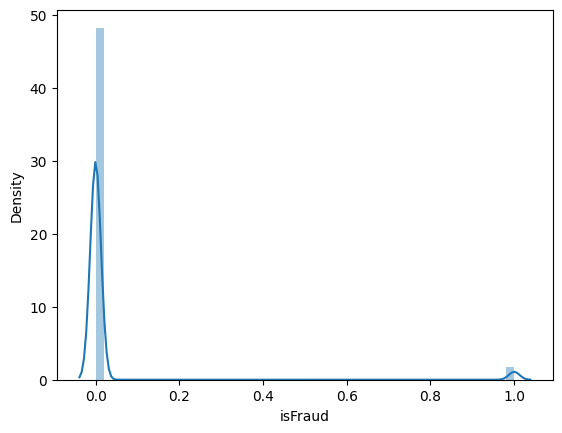

In [33]:
#Distribución de la variable objetivo
sns.distplot(df['isFraud'])

###SKEWNESS
Medida estadística que describe la simetría de la distribución alrededor de un promedio. Si el sesgo es igual a cero, la distribución es simétrica; si el sesgo es positivo la distribución una tendrá una cola asimétrica extendida hacia los valores positivos.

In [34]:
#Ahora mediremos el sesgo de nuestra variable objetivo
print('Skewness de la variable objetivo {:.1f}%'.format(round((df['isFraud'].skew()),1)))

Skewness de la variable objetivo 5.1%


Observación:
La variable objetivo presenta una asimetria muy pronunciada hacia la izquierda.
Se puede arreglar esta asimetria aplicando una transformación logaritmica.

In [35]:
#transformación logaritmica de la variable objetivo
df['isFraud']=np.log1p(df['isFraud'])

<Axes: xlabel='isFraud', ylabel='Density'>

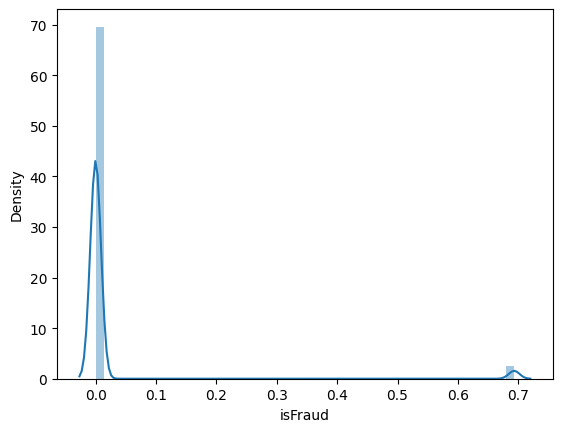

In [36]:
sns.distplot(df['isFraud'])

In [37]:
print('Skewness de la variable transformada {:.1f}%'.format(round((df['isFraud'].skew()),1)))

Skewness de la variable transformada 5.1%


In [38]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0.0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0.0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0.0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0.0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0.0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Exploración de variables

#### 3.1. Tipos de medidores

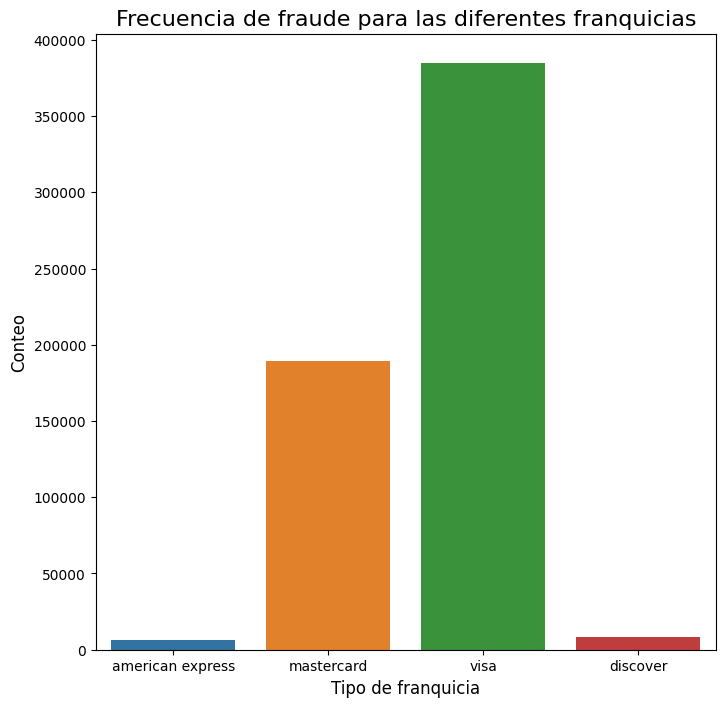

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
meter_types_labels = ['american express', 'mastercard', 'visa', 'discover']
sns.countplot(x = 'card4', data = df).set_title("Frecuencia de fraude para las diferentes franquicias", fontsize=16)
ax.set_xticklabels(meter_types_labels)
plt.xlabel('Tipo de franquicia', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.show()

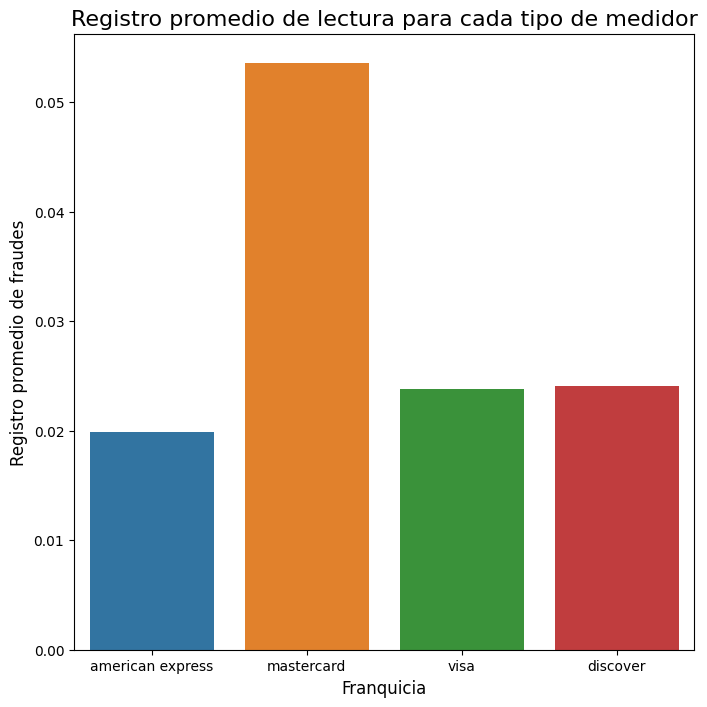

In [48]:

fig, ax = plt.subplots(figsize=(8,8))
meter_types = df.groupby('card4').isFraud.mean().reset_index()
sns.barplot(x ='card4', y ='isFraud', data = meter_types).set_title("Registro promedio de fraude por fanquicia",fontsize=16)
ax.set_xticklabels(meter_types_labels)
plt.xlabel('Franquicia', fontsize=12)
plt.ylabel('Registro promedio de fraudes', fontsize=12)
plt.show()

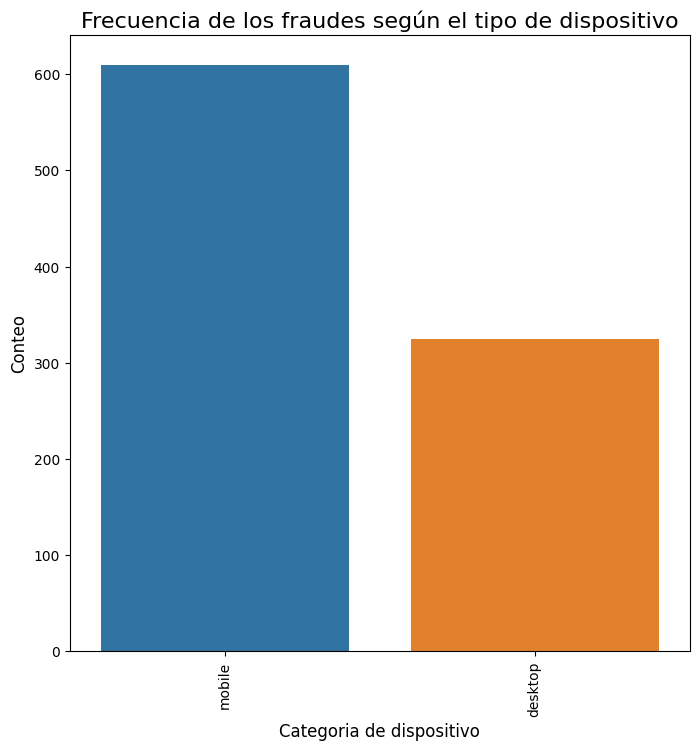

In [51]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'DeviceType', data = df).set_title("Frecuencia de los fraudes según el tipo de dispositivo", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Categoria de dispositivo', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.show()

#### 3.4. Datos faltantes

In [40]:
#Porcentaje de datos faltantes para cada variable del dataset
total           = df.isnull().sum().sort_values(ascending=False)
percent         = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train

,Total,Percent
DeviceInfo,589605,99.84167
id_11,589605,99.84167
id_19,589605,99.84167
id_18,589605,99.84167
id_17,589605,99.84167
...,...,...
C12,0,0.00000
C13,0,0.00000
C14,0,0.00000
isFraud,0,0.00000


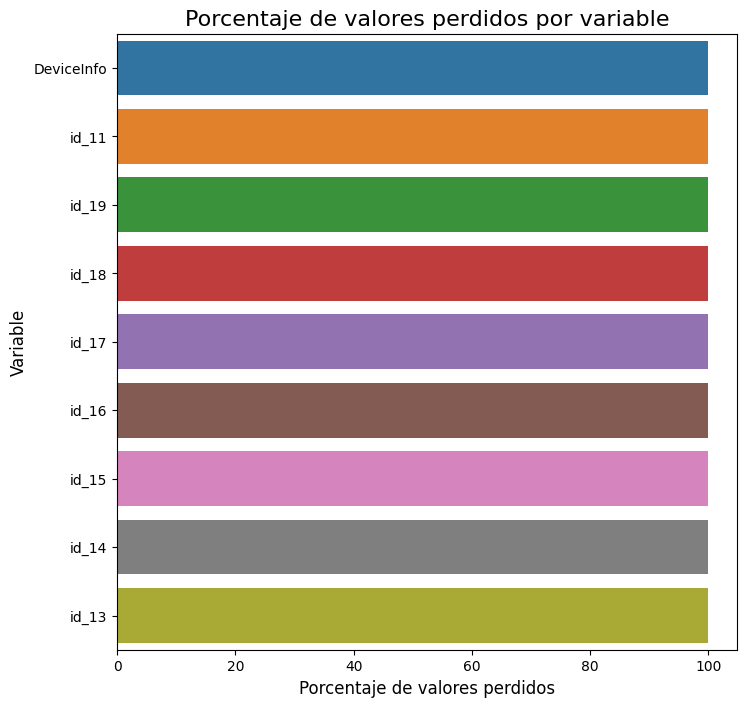

In [55]:
#Gráfico de los porcentajes de valores perdidos para las variables
plt.figure(figsize=(8,8))
sns.barplot(x = missing_train['id_01':'id_38'].Percent,
                    y = missing_train.index[0:9]).set_title("Porcentaje de valores perdidos por variable", fontsize=16)
plt.xlabel('Porcentaje de valores perdidos', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()

#### 3.5. Correlación entre las diferentes variables

In [56]:
#Matriz de correlaciones
corr_matrix = df.corr()

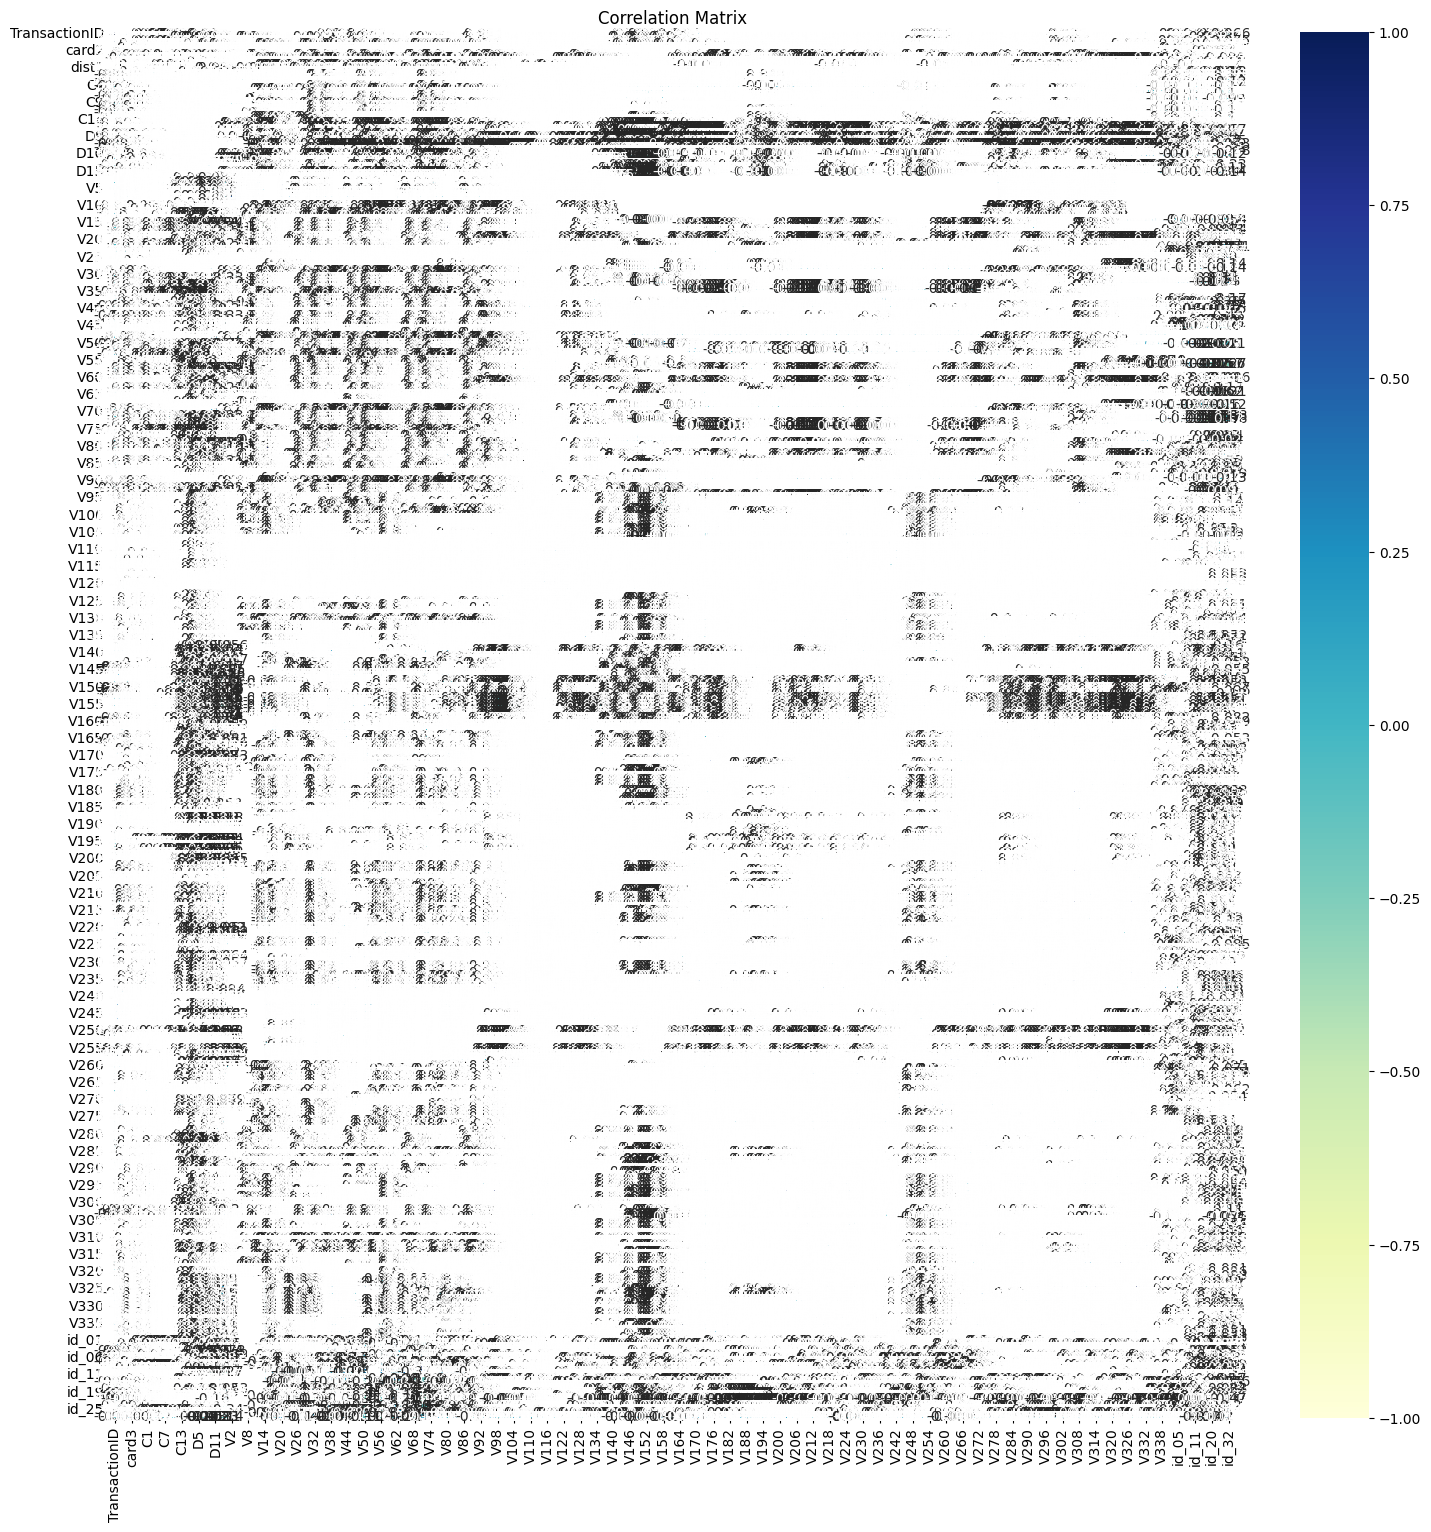

In [57]:
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [41]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["isFraud"].sort_values(ascending=False))
target_corr_df 

NameError: ignored

#### 3.6 Distribución de las variables numéricas

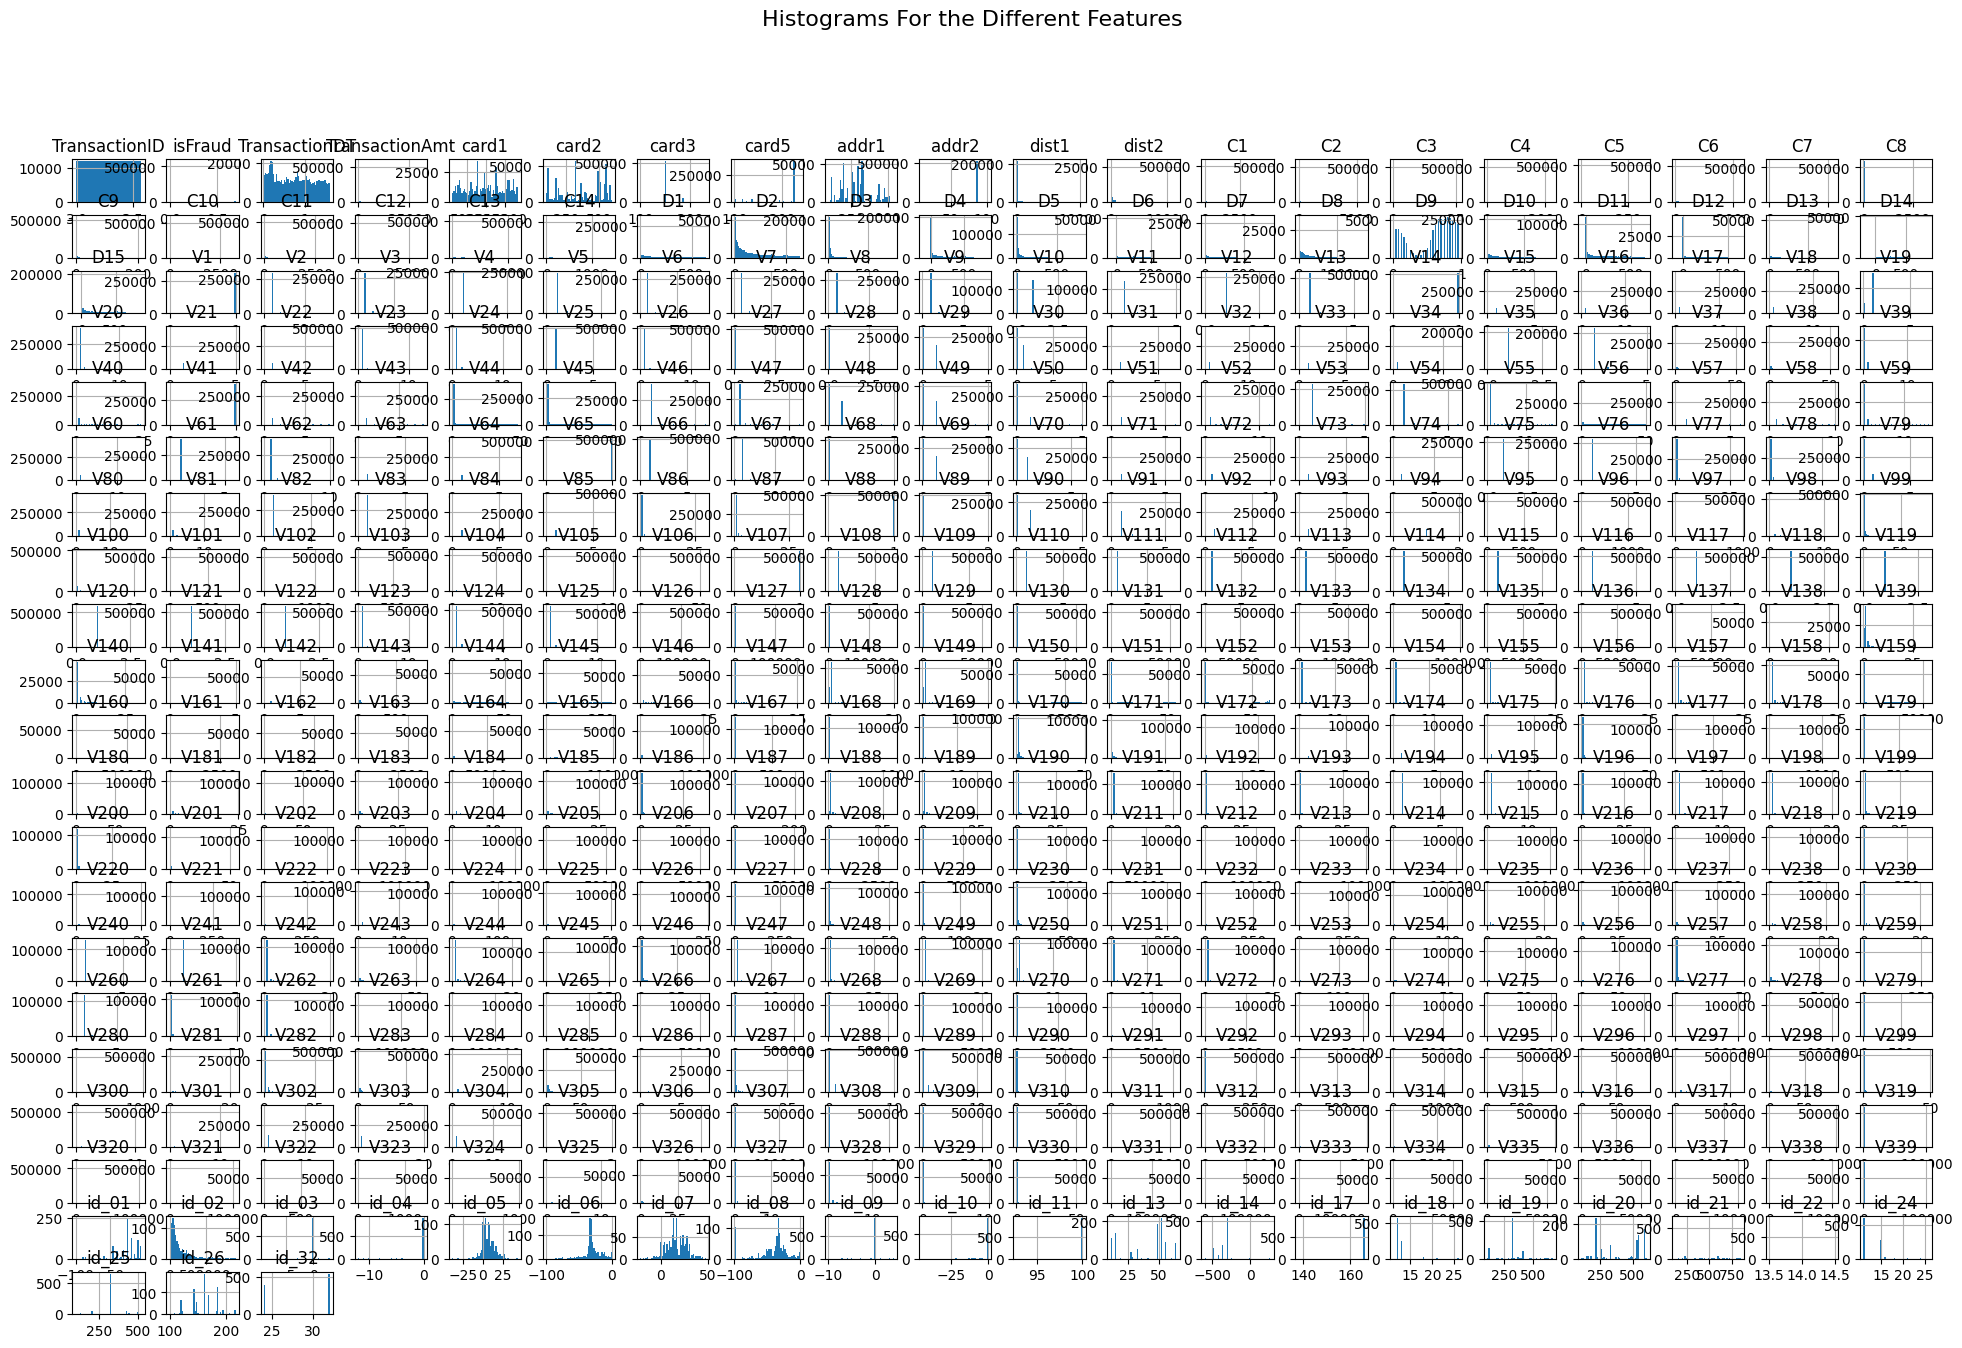

In [42]:
#Gráficos de los histogramas de las distribuciones de las variables
df.hist(bins=50, figsize=(24,15))
plt.suptitle('Histograms For the Different Features', fontsize=16)
plt.show()